In [86]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for data analysis
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sm
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Carlist

In [4]:
df_carList = pd.read_csv("../datasets/Car_listings.csv", delimiter=",")

In [5]:
df_carList.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
df_carList.shape

(852122, 8)

In [5]:
df_carList.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [6]:
df_carList.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [7]:
# Vin is removed because it has no relevance for polution and the fuel consumption
# further the Fuel consumption tables are general for the car models
df_carList = df_carList.drop(['Vin'], axis = 1)

In [8]:
#checking if there are any naN values
df_carList.isnull().values.any()

False

In [9]:
#checking if there are any missing values
df_carList.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Make       0
Model      0
dtype: int64

In [10]:
# Uppercase to match fuel consumption later on
df_carList['Make'] = df_carList['Make'].str.upper()
df_carList['Model'] = df_carList['Model'].str.upper()
df_carList['State'] = df_carList['State'].str.upper()
df_carList['City'] = df_carList['City'].str.upper()

In [11]:
df_carList.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,EL PASO,TX,ACURA,ILX6-SPEED
1,10888,2013,19606,LONG ISLAND CITY,NY,ACURA,ILX5-SPEED
2,8995,2013,48851,EL PASO,TX,ACURA,ILX6-SPEED
3,10999,2014,39922,WINDSOR,CO,ACURA,ILX5-SPEED
4,14799,2016,22142,LINDON,UT,ACURA,ILXAUTOMATIC


## Is there a connection between the car make and it’s price?

In [12]:
# We create a new dataframe with only the columns Price and Model
df_price_model = df_carList.iloc[:, [True, False, False, False, False, True, False]]
df_price_model

,Price,Make
0,8995,ACURA
1,10888,ACURA
2,8995,ACURA
3,10999,ACURA
4,14799,ACURA
...,...,...
852117,63215,VOLVO
852118,72260,VOLVO
852119,55999,VOLVO
852120,60240,VOLVO


In [13]:
means = df_price_model.groupby('Make', as_index=False)['Price'].mean()
means

,Make,Price
0,ACURA,23196.606480
1,ALFA,54228.704545
2,AM,59934.210526
3,ASTON,99573.617450
4,AUDI,28960.997385
5,BENTLEY,101075.310627
6,BMW,26920.712664
7,BUICK,19102.147626
8,CADILLAC,28120.988370
9,CHEVROLET,22090.028034


In [14]:
df_size = df_price_model.groupby('Make', as_index=False)['Make'].size()
df_size

,Make,size
0,ACURA,11049
1,ALFA,44
2,AM,19
3,ASTON,149
4,AUDI,12618
5,BENTLEY,367
6,BMW,32415
7,BUICK,12491
8,CADILLAC,15047
9,CHEVROLET,102268


In [15]:
df_count = df_size.iloc[:, [False, True]]

In [16]:
df_count.columns = ['Count']
df_count

,Count
0,11049
1,44
2,19
3,149
4,12618
5,367
6,32415
7,12491
8,15047
9,102268


In [17]:
horizontal_stack = pd.concat([means, df_count], axis=1)
horizontal_stack

,Make,Price,Count
0,ACURA,23196.606480,11049
1,ALFA,54228.704545,44
2,AM,59934.210526,19
3,ASTON,99573.617450,149
4,AUDI,28960.997385,12618
5,BENTLEY,101075.310627,367
6,BMW,26920.712664,32415
7,BUICK,19102.147626,12491
8,CADILLAC,28120.988370,15047
9,CHEVROLET,22090.028034,102268


<AxesSubplot:xlabel='Make'>

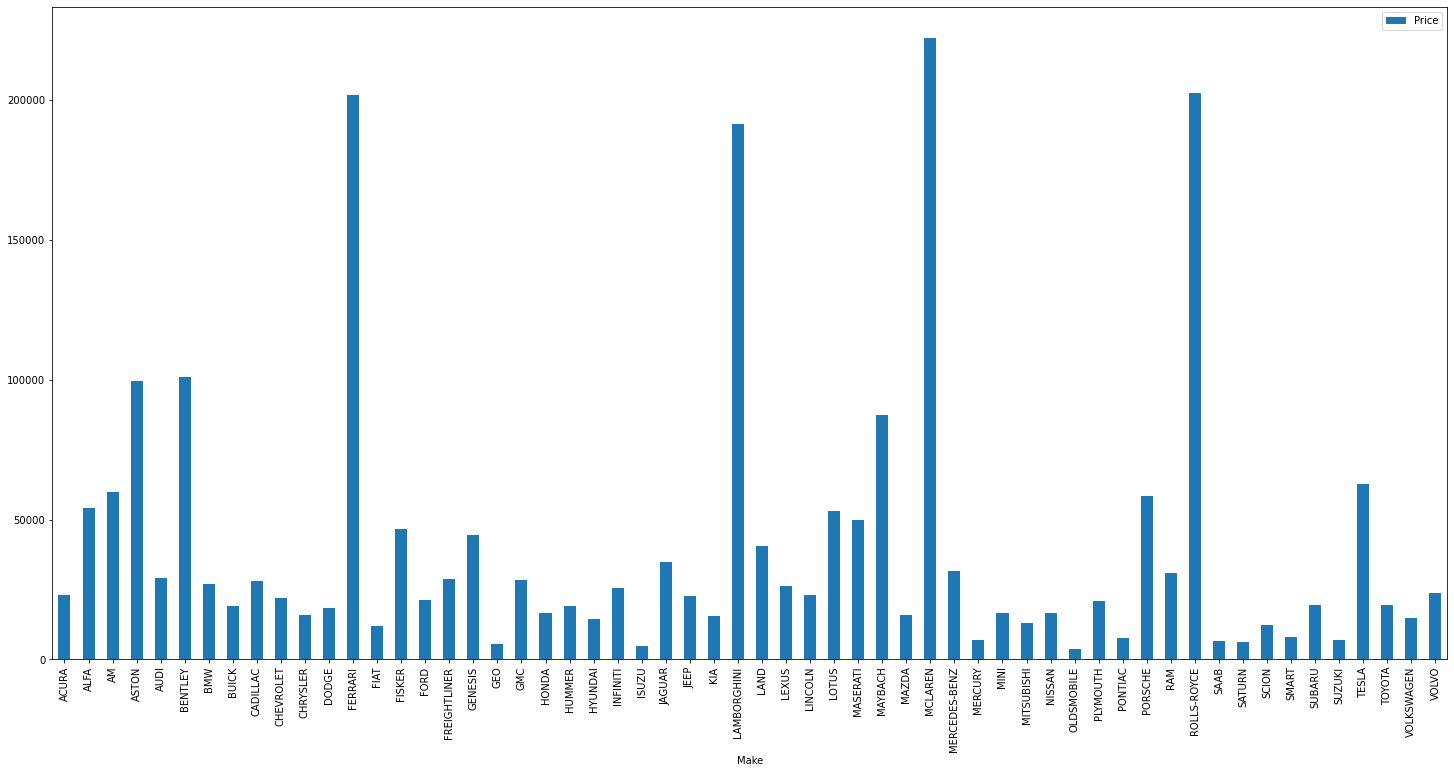

In [18]:
means.plot(kind='bar', x='Make',y='Price', figsize=(25, 12))

#### We know which make is expensive, Ferrari, Lamborghini and Rolls-Royce and those are high in the plot above. When we find them in the horizontal_stack dataframe, then we can see that they have not many cars in the dataset. This is probably because of the price.

<AxesSubplot:xlabel='Make'>

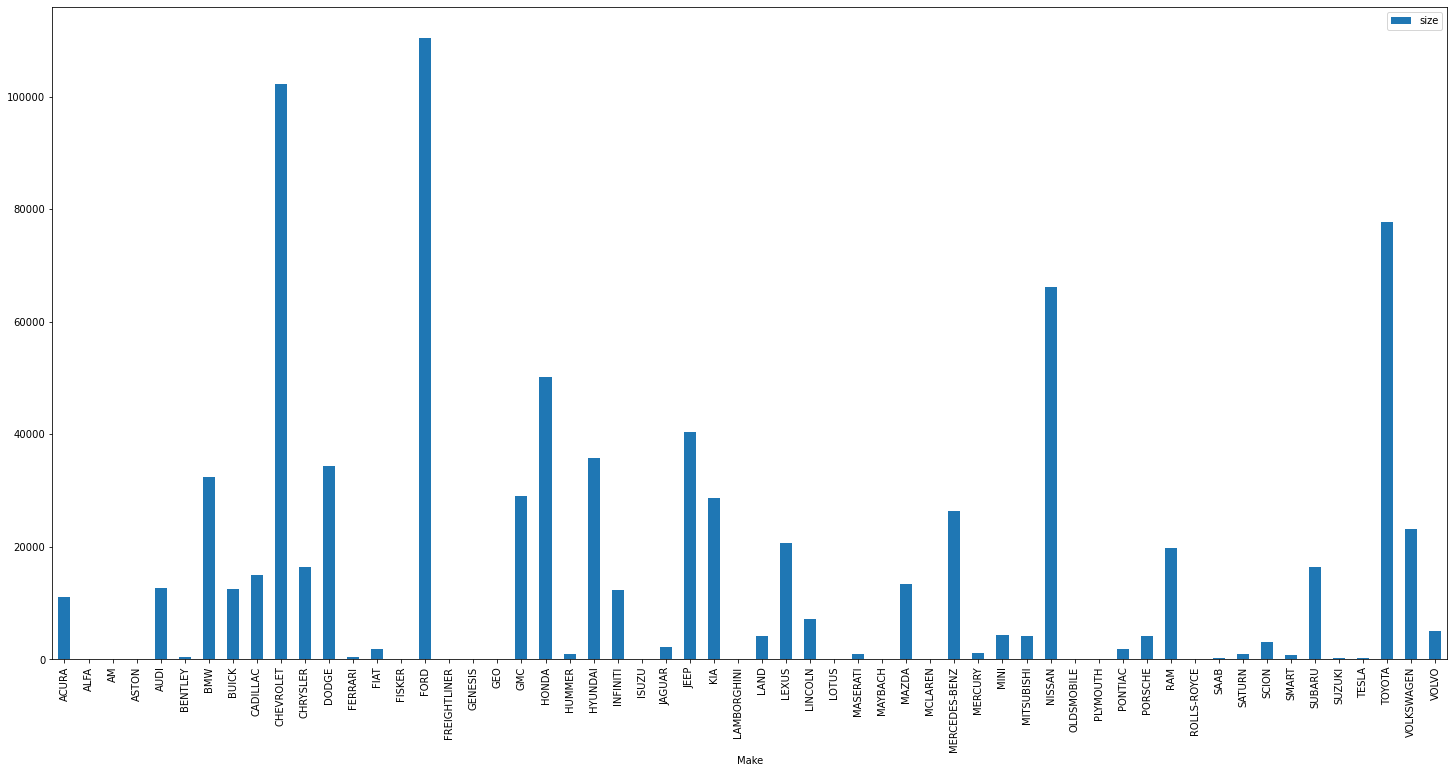

In [19]:
df_size.plot(kind='bar', x='Make',y='size', figsize=(25, 12))

#### There are more less expensive cars than expensive ones.

In [20]:
makes = horizontal_stack['Make'].to_numpy()

In [21]:
prices = horizontal_stack['Price'].to_numpy()

In [22]:
count = horizontal_stack['Count'].to_numpy()

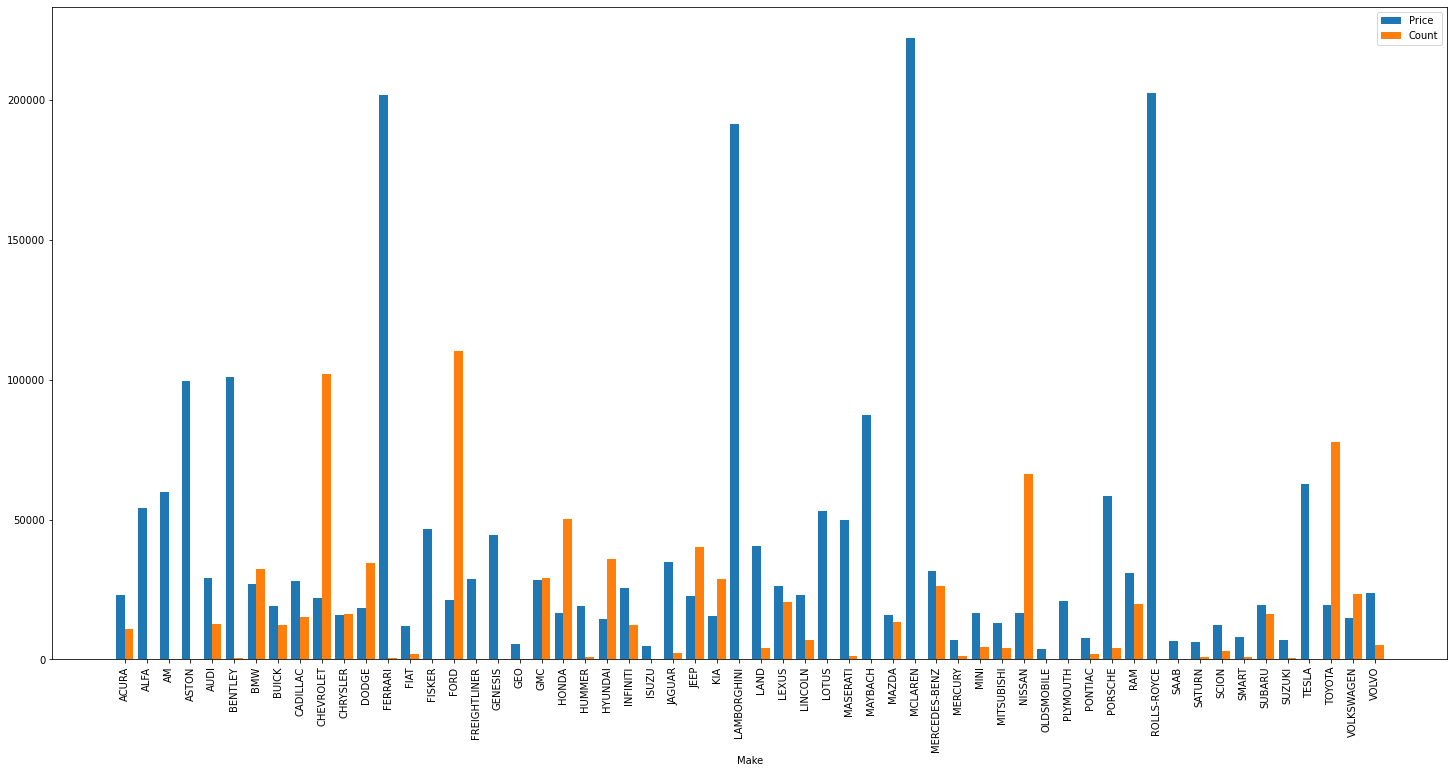

In [23]:
X_axis = np.arange(len(makes))

plt.figure(figsize=(25,12))

plt.bar(X_axis - 0.2, prices, 0.4, label = 'Price')
plt.bar(X_axis + 0.2, count, 0.4, label = 'Count')
  
plt.xticks(X_axis, makes)
plt.xticks(rotation=90)
plt.xlabel("Make")
#plt.title("Number of Students in each group")
plt.legend()
plt.plot()
plt.show()

# Fuel Consumption

In [24]:
df_2022Fuel = pd.read_csv("../datasets/2022_Fuel_Consumption_Ratings.csv", delimiter=";")

In [25]:
df_2022Fuel.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUELTYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS,CO2 RATING,SMOG RATING
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [26]:
df_1990Fuel = pd.read_csv("../datasets/1995-1999_Fuel_Consumption_Ratings.csv", delimiter=";")

CITY HWY COMB = fuel Consumption

In [27]:
df_1990Fuel.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUELTYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299


## Merched

In [28]:
#merching fuel dataframes to a combined new one
merge = [df_1990Fuel, df_2022Fuel]
df_fuel = pd.concat(merge, axis=0)
df_fuel

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUELTYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS,CO2 RATING,SMOG RATING
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,28,232,NaN,NaN
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,29,225,NaN,NaN
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,29,223,NaN,NaN
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,23,288,NaN,NaN
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,22,299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5.0,5.0
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5.0,5.0
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5.0,7.0
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5.0,5.0


In [29]:
df_fuel.describe()

,YEAR,ENGINE SIZE(L),CYLINDERS,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2 EMISSIONS,CO2 RATING,SMOG RATING
count,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,946.000000,946.000000
mean,2002.213886,3.316193,5.756999,14.301926,10.437380,12.563427,23.900784,290.602016,4.539112,4.950317
std,10.340515,1.383030,1.707913,3.564890,2.577376,3.078139,6.271719,70.259267,1.471799,1.679842
min,1995.000000,1.000000,2.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,1996.000000,2.200000,4.000000,11.900000,8.700000,10.500000,19.000000,242.000000,3.000000,3.000000
50%,1998.000000,3.000000,6.000000,13.900000,9.900000,12.200000,23.000000,281.000000,5.000000,5.000000
75%,1999.000000,4.300000,6.000000,16.300000,12.200000,14.500000,27.000000,334.000000,5.000000,6.000000
max,2022.000000,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [30]:
df_fuel.shape

(4465, 15)

In [31]:
df_fuel.dtypes

YEAR                 int64
MAKE                object
MODEL               object
VEHICLE CLASS       object
ENGINE SIZE(L)     float64
CYLINDERS            int64
TRANSMISSION        object
FUELTYPE            object
CITY (L/100 km)    float64
HWY (L/100 km)     float64
COMB (L/100 km)    float64
COMB (mpg)           int64
CO2 EMISSIONS        int64
CO2 RATING         float64
SMOG RATING        float64
dtype: object

In [32]:
# CO2 and SMOG RATING are removed because it is only the 2022 models that have the ratings 
# and the dataset is considerably smaller then the 1990 tabel
# we had considered to instert the mean value in the missing rows but it will give a wrong inpression of the 1990 models 
df_fuel = df_fuel.drop(['CO2 RATING', 'SMOG RATING'], axis = 1)

In [33]:
# the values in this row are identical with COMB (L/100 km) and therefore is not needed, because we don't need the same
# value twice 
df_fuel = df_fuel.drop(['COMB (mpg)'], axis = 1)

In [34]:
#checking if there are any naN values
df_fuel.isnull().values.any()

False

In [35]:
#checking if there are any missing values
df_fuel.isnull().sum()

YEAR               0
MAKE               0
MODEL              0
VEHICLE CLASS      0
ENGINE SIZE(L)     0
CYLINDERS          0
TRANSMISSION       0
FUELTYPE           0
CITY (L/100 km)    0
HWY (L/100 km)     0
COMB (L/100 km)    0
CO2 EMISSIONS      0
dtype: int64

In [36]:
# Uppercase entire dataframe  to  match  CarList 
df_fuel['MAKE'] = df_fuel['MAKE'].str.upper()
df_fuel['MODEL'] = df_fuel['MODEL'].str.upper()
df_fuel['VEHICLE CLASS'] = df_fuel['VEHICLE CLASS'].str.upper()

In [37]:
df_fuel

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUELTYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),CO2 EMISSIONS
0,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.6,8.3,10.1,232
1,1995,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,11.0,8.3,9.8,225
2,1995,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.3,9.7,223
3,1995,ACURA,LEGEND,COMPACT,3.2,6,A4,Z,14.2,10.5,12.5,288
4,1995,ACURA,LEGEND COUPE,COMPACT,3.2,6,A4,Z,14.6,11.0,13.0,299
...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,VOLVO,XC40 T5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,219
942,2022,VOLVO,XC60 B5 AWD,SUV: SMALL,2.0,4,AS8,Z,10.5,8.1,9.4,219
943,2022,VOLVO,XC60 B6 AWD,SUV: SMALL,2.0,4,AS8,Z,11.0,8.7,9.9,232
944,2022,VOLVO,XC90 T5 AWD,SUV: STANDARD,2.0,4,AS8,Z,11.5,8.4,10.1,236


### What models pollute the most?

In [38]:
df_fuel.sort_values('CO2 EMISSIONS', ascending = False)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUELTYPE,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),CO2 EMISSIONS
134,2022,BUGATTI,CHIRON SUPER SPORT,TWO-SEATER,8.0,16,AM7,Z,30.3,20.9,26.1,608
133,2022,BUGATTI,CHIRON PUR SPORT,TWO-SEATER,8.0,16,AM7,Z,30.3,20.9,26.1,608
3054,1999,FERRARI,550 MARANELLO,TWO-SEATER,5.5,12,M6,Z,28.5,18.0,23.8,547
1748,1997,FERRARI,456,SUBCOMPACT,5.5,12,A4,Z,28.3,17.1,23.3,536
2406,1998,FERRARI,550 MARANELLO,TWO-SEATER,5.5,12,M6,Z,28.3,17.0,23.2,534
...,...,...,...,...,...,...,...,...,...,...,...,...
885,2022,TOYOTA,COROLLA HYBRID,COMPACT,1.8,4,AV,X,4.4,4.5,4.5,106
895,2022,TOYOTA,PRIUS,MID-SIZE,1.8,4,AV,X,4.4,4.7,4.5,106
458,2022,HYUNDAI,ELANTRA HYBRID BLUE,MID-SIZE,1.6,4,AM6,X,4.5,4.2,4.4,103
459,2022,HYUNDAI,IONIQ,FULL-SIZE,1.6,4,AM6,X,4.3,4.1,4.2,99


the car that pollutes the most is a Bugatti Chiron Super Sport

### What make have improved in preventing pollution?

In [39]:
# We group by make and year because we want to know the mean emission from the first and last year per. make
df_preventPollution = df_fuel.groupby(['MAKE', 'YEAR']).mean()
df_preventPollution

ENGINE SIZE(L)  CYLINDERS  CITY (L/100 km)  HWY (L/100 km)  \
MAKE  YEAR                                                               
ACURA 1995        2.625000   5.250000        13.350000        9.725000   
      1996        2.575000   5.125000        13.075000        9.712500   
      1997        2.430769   4.846154        12.315385        9.184615   
      1998        2.430769   4.846154        12.346154        9.138462   
      1999        2.372727   4.727273        12.145455        8.845455   
...                    ...        ...              ...             ...   
VOLVO 1996        2.446667   5.200000        13.860000        9.440000   
      1997        2.446154   5.153846        13.861538        9.584615   
      1998        2.433333   5.133333        14.086667        9.886667   
      1999        2.395455   5.090909        13.595455        9.577273   
      2022        2.000000   4.000000        10.700000        7.816667   

            COMB (L/100 km)  CO2 EMISSIONS  
MAKE  YEAR                                  
ACURA 1995        11.712500     269.375000  
      1996        11.550000     265.875000  
      1997        10.900000     250.846154  
      1998        10.900000     250.846154  
      1999        10.645455     245.000000  
...                     ...            ...  
VOLVO 1996        11.893333     273.533333  
      1997        11.953846     274.846154  
      1998        12.193333     280.533333  
      1999        11.781818     271.045455  
      2022         9.408333     219.416667  

[232 rows x 6 columns]

In [40]:
df_preventPollution.head(10)

ENGINE SIZE(L)  CYLINDERS  CITY (L/100 km)  HWY (L/100 km)  \
MAKE         YEAR                                                               
ACURA        1995        2.625000   5.250000        13.350000        9.725000   
             1996        2.575000   5.125000        13.075000        9.712500   
             1997        2.430769   4.846154        12.315385        9.184615   
             1998        2.430769   4.846154        12.346154        9.138462   
             1999        2.372727   4.727273        12.145455        8.845455   
             2022        2.487500   4.750000        11.487500        8.675000   
ALFA ROMEO   1995        3.000000   6.000000        16.400000       11.200000   
             2022        2.300000   4.666667        11.500000        8.483333   
ASTON MARTIN 2022        4.480000   9.600000        15.140000       10.540000   
AUDI         1995        2.733333   5.888889        14.277778       10.566667   

                   COMB (L/100 km)  CO2 EMISSIONS  
MAKE         YEAR                                  
ACURA        1995        11.712500     269.375000  
             1996        11.550000     265.875000  
             1997        10.900000     250.846154  
             1998        10.900000     250.846154  
             1999        10.645455     245.000000  
             2022        10.225000     239.375000  
ALFA ROMEO   1995        14.100000     324.500000  
             2022        10.116667     237.500000  
ASTON MARTIN 2022        13.040000     306.400000  
AUDI         1995        12.600000     289.888889

In [41]:
# We get all the values of mean CO2 emisson from the first year 
first_df = df_preventPollution.groupby(['MAKE'])['CO2 EMISSIONS'].first()

In [42]:
# We get all the values of mean CO2 emisson from the last year 
last_df = df_preventPollution.groupby(['MAKE'])['CO2 EMISSIONS'].last()

In [43]:
# We stack the two dataframes next to each other 
horizontal_stack = pd.concat([first_df, last_df], axis=1)
horizontal_stack.columns = ['FIRST','LAST']
horizontal_stack

,FIRST,LAST
MAKE,,
ACURA,269.375000,239.375000
ALFA ROMEO,324.500000,237.500000
ASTON MARTIN,306.400000,306.400000
AUDI,289.888889,251.911111
BENTLEY,489.625000,342.875000
BMW,286.583333,276.116667
BUGATTI,579.333333,579.333333
BUICK,279.642857,217.111111
CADILLAC,327.000000,260.307692


In [44]:
# We create a new column called DIFF which contains the difference between first and last years CO2.
# Please note that the highst values are the best improved and the negative values are the least improved
horizontal_stack['DIFF'] = horizontal_stack["FIRST"] - horizontal_stack["LAST"]
horizontal_stack.sort_values(by=['DIFF'], ascending=False)

,FIRST,LAST,DIFF
MAKE,,,
BENTLEY,489.625000,342.875000,146.750000
LAND ROVER,435.666667,303.000000,132.666667
ROLLS-ROYCE,492.142857,385.285714,106.857143
ALFA ROMEO,324.500000,237.500000,87.000000
JEEP,342.600000,266.235294,76.364706
MERCEDES-BENZ,317.000000,243.511628,73.488372
GMC,382.078947,310.555556,71.523392
JAGUAR,353.750000,282.500000,71.250000
CADILLAC,327.000000,260.307692,66.692308


#### From the above we can see that Bently has improved the most in preventing CO2 Emission and GEO has improved the least. 

### What year, between 1995 and 1999, was there the most pollution?

In [45]:
df_fuel.groupby('YEAR').mean()

,ENGINE SIZE(L),CYLINDERS,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),CO2 EMISSIONS
YEAR,,,,,,
1995,3.443520,5.846611,15.078835,11.057313,13.268609,307.577883
1996,3.313610,5.707736,14.624355,10.615759,12.822063,296.186246
1997,3.318541,5.747720,14.646049,10.588298,12.818693,295.861702
1998,3.351262,5.788644,14.793691,10.637382,12.927129,297.990536
1999,3.290116,5.799419,14.711628,10.646802,12.882849,295.562500
2022,3.198732,5.668076,12.506448,9.363319,11.092072,259.172304


1995 had the most pollution recording to the table above

## Stage 3 ML

The datasets are supervised becaused it have labels on the data and therefore have we choosen Regration in diffirent forms, as linear and logistiscs and Polylomier <br> 

We will also use clasifications such as naive base, Logistic Regression, KNN and random forrest clasifer. The reason why we have choosen so many is because to see which one is the best for the data. <br>

In the dataset df_carList we know that there are some expentive cars and we want to remove them to get at better Linear Regression, than we expect. So now the price is from 0 - 250000$

### Regression

In [46]:
df_carList.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,EL PASO,TX,ACURA,ILX6-SPEED
1,10888,2013,19606,LONG ISLAND CITY,NY,ACURA,ILX5-SPEED
2,8995,2013,48851,EL PASO,TX,ACURA,ILX6-SPEED
3,10999,2014,39922,WINDSOR,CO,ACURA,ILX5-SPEED
4,14799,2016,22142,LINDON,UT,ACURA,ILXAUTOMATIC


In [47]:
df_carListNew = df_carList.drop(df_carList[df_carList.Price > 250000].index)

In [48]:
df_carListNew['Make'] = pd.factorize(df_carListNew['Make'])[0]

In [49]:
df_carListNew.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,EL PASO,TX,0,ILX6-SPEED
1,10888,2013,19606,LONG ISLAND CITY,NY,0,ILX5-SPEED
2,8995,2013,48851,EL PASO,TX,0,ILX6-SPEED
3,10999,2014,39922,WINDSOR,CO,0,ILX5-SPEED
4,14799,2016,22142,LINDON,UT,0,ILXAUTOMATIC


In [50]:
x = df_carListNew.iloc[:,5:6]
x

,Make
0,0
1,0
2,0
3,0
4,0
...,...
852117,57
852118,57
852119,57
852120,57


In [51]:
y = df_carListNew.iloc[:,0:1]
y

,Price
0,8995
1,10888
2,8995
3,10999
4,14799
...,...
852117,63215
852118,72260
852119,55999
852120,60240


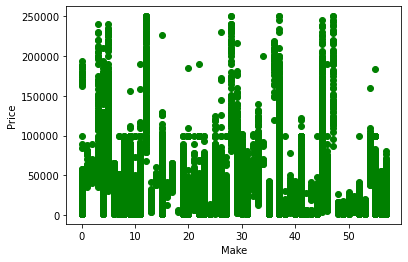

In [52]:
# Plot all
plt.xlabel('Make')
plt.ylabel('Price')
plt.scatter(x, y, color='green')
plt.show()

In [53]:
test_set_size = 0.2
seed = 7 # randomiztion

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_set_size, random_state=seed)

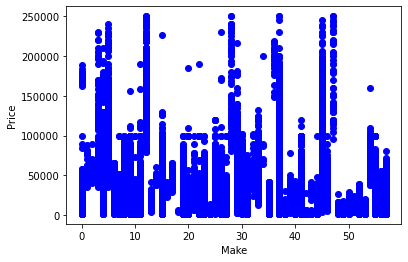

In [54]:
# Plot train data
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

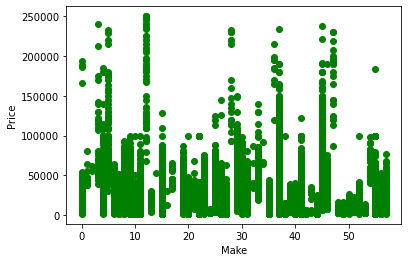

In [55]:
# Plot test data - randomly selected
plt.scatter(X_test, y_test, color='green')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

In [56]:
# Create linear regressor object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
# Predict the output
y_predicted = regressor.predict(X_test)
y_predicted

array([[21955.205437  ],
       [21429.0205385 ],
       [21955.205437  ],
       ...,
       [20797.59866031],
       [19850.46584303],
       [21586.87600805]])

In [58]:
regressor.score(X_test, y_test)

0.00436611321885505

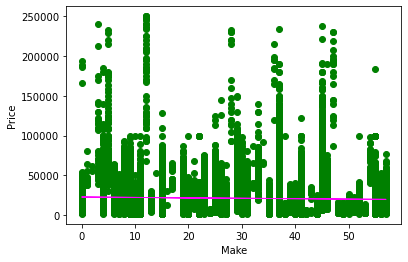

In [59]:
# Plot output
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_predicted, color='magenta', linewidth=1)
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

In [60]:
# Predict the output
y_predicted = regressor.predict(x)
y_predicted

array([[22744.48278473],
       [22744.48278473],
       [22744.48278473],
       ...,
       [19745.22886333],
       [19745.22886333],
       [19745.22886333]])

In [61]:
# RMSE (Root mean squared error) answers the question: "How similar, on average, are the numbers in list1 to list2?"  
rmse_linear = np.sqrt(sm.mean_squared_error(y, y_predicted))
r2_linear = sm.r2_score(y, y_predicted)
r2_linear

0.004532666722273482

In [62]:
# polynomial regression model
polyreg = PolynomialFeatures(degree=4)

# transform my train data to adjust the polynom to linear regression model
X_pol = polyreg.fit_transform(X_train)

In [63]:
pollinreg = LinearRegression()
pollinreg.fit(X_pol, y_train)

LinearRegression()

In [64]:
# apply the model on my train data
y_predicted = pollinreg.predict(X_pol)
y_predicted.shape

(681563, 1)

In [65]:
# RMSE (Root mean squared error) answers the question: "How similar, on average, are the numbers in list1 to list2?"  
rmse_new = np.sqrt(sm.mean_squared_error(y_train, y_predicted))
r2_new = sm.r2_score(y_train, y_predicted)
r2_new

0.01581230694709901

As you can see from the score, r2 and rmse are not that good and therefore it don't work with our dataset.

### Classification
#### Bayes Classification

In [66]:
df_carList.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,EL PASO,TX,ACURA,ILX6-SPEED
1,10888,2013,19606,LONG ISLAND CITY,NY,ACURA,ILX5-SPEED
2,8995,2013,48851,EL PASO,TX,ACURA,ILX6-SPEED
3,10999,2014,39922,WINDSOR,CO,ACURA,ILX5-SPEED
4,14799,2016,22142,LINDON,UT,ACURA,ILXAUTOMATIC


In [67]:
df_carListNewClass = df_carList
df_carListNewClass['City'] = pd.factorize(df_carListNewClass['City'])[0]
df_carListNewClass['State'] = pd.factorize(df_carListNewClass['State'])[0]
df_carListNewClass['Model'] = pd.factorize(df_carListNewClass['Model'])[0]

In [68]:
X = df_carList.loc[:, df_carList.columns != 'Make'].values
print(X)
y = df_carList.iloc[:,5:6].values
print(y)

[[ 8995  2014 35725     0     0     0]
 [10888  2013 19606     1     1     1]
 [ 8995  2013 48851     0     0     0]
 ...
 [55999  2016 28941  1019     2  2610]
 [60240  2017  3005   758     8  2696]
 [76995  2017  2502   930     1  2697]]
[['ACURA']
 ['ACURA']
 ['ACURA']
 ...
 ['VOLVO']
 ['VOLVO']
 ['VOLVO']]


In [69]:
test_set_size = 0.2
# Initial value for randomization
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)

In [70]:
model = GaussianNB()
model.fit(X_train, y_train)

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [71]:
model.score(X_test, y_test)

0.9177996186005575

In [72]:
#prediction = model.predict([[8995, 2014, 35725, 0, 0, 0]])
prediction = model.predict(X_test)
prediction

array(['FORD', 'LAND', 'FORD', ..., 'FORD', 'CHEVROLET', 'RAM'],
      dtype='<U13')

In [73]:
prediction.shape

(170425,)

In [74]:
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)

[[ 2034     1     0 ...     0     0     0]
 [    0    10     0 ...     0     0     0]
 [    0     0     2 ...     0     0     0]
 ...
 [    0     0     0 ... 15065     0     0]
 [    0     0     0 ...   148  4308    49]
 [    0     0     0 ...     0   211   711]]


In [75]:
print(classification_report(y_test, prediction))

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

        ACURA       0.98      0.93      0.95      2193
         ALFA       0.91      0.77      0.83        13
           AM       1.00      1.00      1.00         2
        ASTON       0.88      0.88      0.88        34
         AUDI       0.94      0.96      0.95      2545
      BENTLEY       0.74      0.79      0.76        89
          BMW       1.00      0.99      0.99      6540
        BUICK       0.98      0.90      0.94      2450
     CADILLAC       0.92      0.83      0.87      2958
    CHEVROLET       0.97      0.99      0.98     20185
     CHRYSLER       0.99      0.96      0.97      3254
        DODGE       0.72      0.94      0.82      6851
      FERRARI       0.86      0.99      0.92        67
         FIAT       1.00      0.85      0.92       347
       FISKER       1.00      0.80      0.89         5
         FORD       1.00      0.97      0.98     22151
 FREIGHTLINER       0.00      0.00      0.00         2
      GEN

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### KNeighbors Classifier

In [76]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(X_train, y_train)

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [104]:
model.score(X_test, y_test)

0.004876045181164735

In [79]:
prediction.shape

(170425,)

In [80]:
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)

[[ 2034     1     0 ...     0     0     0]
 [    0    10     0 ...     0     0     0]
 [    0     0     2 ...     0     0     0]
 ...
 [    0     0     0 ... 15065     0     0]
 [    0     0     0 ...   148  4308    49]
 [    0     0     0 ...     0   211   711]]


In [81]:
print(classification_report(y_test, prediction))

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

        ACURA       0.98      0.93      0.95      2193
         ALFA       0.91      0.77      0.83        13
           AM       1.00      1.00      1.00         2
        ASTON       0.88      0.88      0.88        34
         AUDI       0.94      0.96      0.95      2545
      BENTLEY       0.74      0.79      0.76        89
          BMW       1.00      0.99      0.99      6540
        BUICK       0.98      0.90      0.94      2450
     CADILLAC       0.92      0.83      0.87      2958
    CHEVROLET       0.97      0.99      0.98     20185
     CHRYSLER       0.99      0.96      0.97      3254
        DODGE       0.72      0.94      0.82      6851
      FERRARI       0.86      0.99      0.92        67
         FIAT       1.00      0.85      0.92       347
       FISKER       1.00      0.80      0.89         5
         FORD       1.00      0.97      0.98     22151
 FREIGHTLINER       0.00      0.00      0.00         2
      GEN

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Works best on large noicy data and because we have data that are more compact and simmalar the result is not the best

#### LogisticRegression

In [91]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred = lr.predict(X_test)

In [98]:
model.score(X_test, y_test)

0.004876045181164735

In [99]:
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)

[[ 2034     1     0 ...     0     0     0]
 [    0    10     0 ...     0     0     0]
 [    0     0     2 ...     0     0     0]
 ...
 [    0     0     0 ... 15065     0     0]
 [    0     0     0 ...   148  4308    49]
 [    0     0     0 ...     0   211   711]]


In [100]:
print(classification_report(y_test, prediction))

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

        ACURA       0.98      0.93      0.95      2193
         ALFA       0.91      0.77      0.83        13
           AM       1.00      1.00      1.00         2
        ASTON       0.88      0.88      0.88        34
         AUDI       0.94      0.96      0.95      2545
      BENTLEY       0.74      0.79      0.76        89
          BMW       1.00      0.99      0.99      6540
        BUICK       0.98      0.90      0.94      2450
     CADILLAC       0.92      0.83      0.87      2958
    CHEVROLET       0.97      0.99      0.98     20185
     CHRYSLER       0.99      0.96      0.97      3254
        DODGE       0.72      0.94      0.82      6851
      FERRARI       0.86      0.99      0.92        67
         FIAT       1.00      0.85      0.92       347
       FISKER       1.00      0.80      0.89         5
         FORD       1.00      0.97      0.98     22151
 FREIGHTLINER       0.00      0.00      0.00         2
      GEN

/Users/jacobsimonsen/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
